In [153]:
import matplotlib.pyplot as plt
import pickle
import copy
import numpy as np
import networkx as nx

In [2808]:
dataset_name = 'IMDB-BINARY'
expt_name = 'rbf12_bugfix2_largebatch_static'

results_dir = 'ten10folds/' + dataset_name + '/' + expt_name 



In [2809]:
#max_epoch = 500
#sampling_freq = 100
#start_sample = 99
#result_dump = 'ten10folds/' + dataset_name + '/PL/' + expt_name + '/' + expt_name + '_'
result_dump = 'ten10folds/' + dataset_name + '/' + expt_name + '/' + expt_name + '_'


In [2810]:
max_runs, max_folds =10,10

min_runs = 0
max_epochs = 200
#epoch_samples =  [0, 9, 19, 29, 39, 49]
epoch_samples = [k for k in [0, 24, 49, 74, 99, 124, 149, 174, 199, 224, 249] if k < max_epochs]

runs = range(min_runs, max_runs)
folds = range(max_folds)

train = []
test = []
loss = []
filt = []
train_reg = []
test_reg =[]
dtheta = []
theta = []

for run in runs:

    for fold in folds:
        run_fold_index = str(run) + '_' + str(fold)  + '.pkl'
        train.append(pickle.load(open(result_dump + 'train_acc_' + run_fold_index, 'rb'))[0:max_epochs])
        test.append(pickle.load(open(result_dump + 'test_acc_' + run_fold_index, 'rb'))[0:len(epoch_samples)])
        loss.append(pickle.load(open(result_dump + 'loss_' + run_fold_index, 'rb'))[0:max_epochs])
        #train_reg.append(pickle.load(open(result_dump + 'train_reg_' + run_fold_index, 'rb')))
        #test_reg.append(pickle.load(open(result_dump + 'test_reg_' + run_fold_index, 'rb')))
        #dtheta.append(pickle.load(open(result_dump + 'dtheta_' + run_fold_index, 'rb')))
        theta.append(np.array(pickle.load(open(result_dump + 'theta_' + run_fold_index, 'rb'))))
        #filt.append(pickle.load(open(result_dump + 'learnt_filter_' + run_fold_index, 'rb')))


In [2811]:
train = np.reshape(np.array(train), [(max_runs- min_runs)*max_folds, -1])
test = np.reshape(np.array(test), [(max_runs- min_runs)*max_folds, -1])
loss = np.reshape(np.array(loss), [(max_runs- min_runs)*max_folds, -1])
#loss = np.reshape(np.array(loss), [max_runs*max_folds, -1])

In [2812]:
cheat_tq75 = np.quantile(np.mean(np.reshape(test, [(max_runs- min_runs), max_folds, -1]), axis=1), 0.75, axis=0)
cheat_tq25 = np.quantile(np.mean(np.reshape(test, [(max_runs- min_runs), max_folds, -1]), axis=1), 0.25, axis=0)
cheat_std = np.std(np.mean(np.reshape(test, [(max_runs- min_runs), max_folds, -1]), axis=1), axis=0)

In [2813]:
train_mean = np.mean(train, axis = 0)
train_std = np.std(train, axis=0)

test_mean = np.mean(test, axis = 0)
test_std = np.std(test, axis=0)
loss_mean = np.mean(loss, axis = 0)

train_q75 = np.quantile(train, 0.75, axis=0)
train_q25 = np.quantile(train, 0.25, axis=0)

test_q75 = np.quantile(test, 0.75, axis=0)
test_q25 = np.quantile(test, 0.25, axis=0)

loss_q75 = np.quantile(loss, 0.75, axis=0)
loss_q25 = np.quantile(loss, 0.25, axis=0)

In [2814]:
j = np.argmax(test_mean)
k = np.argmax(train_mean)

print(test_mean[j], test_std[j], cheat_std[j], epoch_samples[j])
print(test_mean[j-1], test_std[j-1],  cheat_std[j-1] ,epoch_samples[j-1])
print(test_mean[j+1],test_std[j+1],  cheat_std[j+1] ,epoch_samples[j+1])
print('--------------------------------')
print(train_mean[k], train_std[k], k)

0.7164999999999998 0.04763139720814412 0.009330058949438658 74
0.7147999999999999 0.044754441120407266 0.007871467461661733 49
0.7120999999999996 0.04680373916686573 0.008166394553289682 99
--------------------------------
0.7840555555555556 0.011905362418716516 194


In [2815]:
print(test_mean)

[0.5118 0.7132 0.7148 0.7165 0.7121 0.7143 0.7098 0.7108 0.7094]


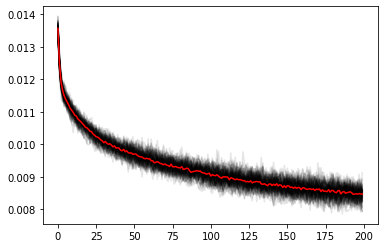

In [2816]:
for t in loss:
    plt.plot(t, 'k-', alpha = 0.1)
plt.plot(np.median(loss, axis = 0), 'r')
#plt.ylim([0.4,0.95])
#plt.savefig('max_pers_train_fog.pdf', dpi=300)

In [2817]:
epoch_samples

[0, 24, 49, 74, 99, 124, 149, 174, 199]

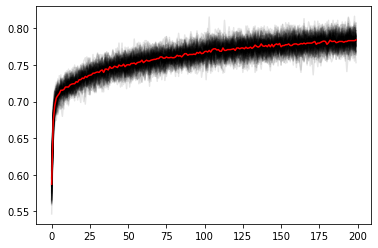

In [2818]:
for t in train:
    plt.plot( t, 'k-', alpha = 0.1)
plt.plot(np.median(train, axis = 0), 'r')

0.0044999999999998375


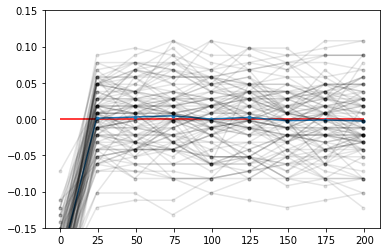

In [2819]:
perslay = 0.712
plt.hlines(0, 0, max_epochs, 'r')
plt.plot(epoch_samples, test_mean - perslay, '.-', label = 'train mean')
plt.ylim([-0.15, 0.15])
for t in test:
    plt.plot(epoch_samples, t - perslay, 'k.-', alpha = 0.1)
#plt.ylim([0.375,0.575]);
#plt.savefig('max_pers_train_fog.pdf', dpi=300)
print(max(test_mean - perslay))

(-0.05, 0.05)

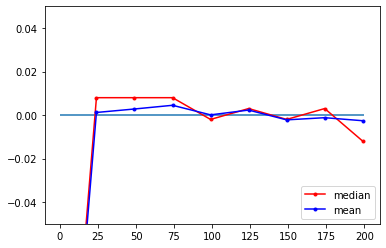

In [2820]:

#hofer = 0.745 - perslay
#epoch_samples = [0, 24, 49, 74, 99, ]
#epoch_samples = [0, 24, 49, 99, 199, 299]
plt.plot(epoch_samples,np.median(test, axis = 0) - perslay , 'r.-', label = 'median')
plt.plot(epoch_samples,np.mean(test, axis = 0) - perslay, 'b.-', label = 'mean')
plt.legend(loc = 'lower right')
plt.hlines(0, 0, max_epochs, 'tab:blue', label = 'perslay')
#plt.hlines(hofer, 0, max_epochs, 'tab:orange', label = 'hofer')
#plt.hlines(perslay_max, 0, max_epoch)
plt.ylim([-0.05, 0.05])
#plt.ylim([0.7,0.81])
#plt.savefig('max_pers_train_fog.pdf', dpi=300)

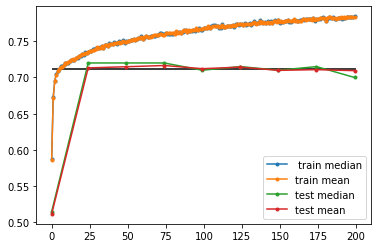

In [2821]:
plt.plot(np.median(train, axis = 0), '.-', label = ' train median')
plt.plot(np.mean(train, axis = 0), '.-', label = 'train mean')
plt.plot(epoch_samples,np.median(test, axis = 0), '.-', label = 'test median')
plt.plot(epoch_samples,np.mean(test, axis = 0), '.-', label = 'test mean')
plt.hlines(perslay, 0, max_epochs)
plt.legend()
plt.legend()

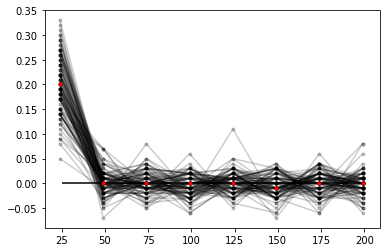

In [2822]:
for t in test:
    plt.plot(epoch_samples[1:], np.diff(t), 'k.-', alpha = 0.2)
plt.plot(epoch_samples[1:], np.median(np.diff(test, axis = 1), axis =0), 'r.')
plt.hlines(0.0, 25, max_epochs)
#plt.ylim([0.375,0.575]);
#plt.savefig('max_pers_train_fog.pdf', dpi=300)

In [ ]:
j = -1
print(test_mean[j], cheat_tq75[j] - cheat_tq25[j],  cheat_std[j])

In [ ]:
#epochs = np.arange(start_sample + sampling_freq , max_epoch + sampling_freq, sampling_freq)
epochs = np.arange(start_sample , max_epoch , sampling_freq)

fig, ax1 = plt.subplots(figsize = [10, 6])
lns1 = ax1.plot(epochs, loss_mean, 'k-', label = 'Loss')
ax1.fill_between(epochs, loss_q25, loss_q75, color = '0.65')
#ax1.set_ylim([0.0, 1.1])
ax1.set_xlabel('epochs')
ax1.set_ylabel('BCE loss')


ax2 = ax1.twinx()
lns2 = ax2.plot(epochs, test_mean, label = 'Test')
ax2.fill_between(epochs, test_q25, test_q75, color = '0.85')
lns3 = ax2.plot(epochs, train_mean, label = 'Train')
ax2.fill_between(epochs, train_q25, train_q75, color = '0.65')
ax2.fill_between(epochs, cheat_tq25, cheat_tq75, color = '0.65')
#ax2.set_ylim([0.45, 0.7])
ax2.set_ylabel('Accuracy')

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.title('hks10 Baseline')
#plt.savefig(expt_name + '_lossacc_v_epoch.jpg', dpi=300)


In [ ]:
ts = 4110 - 411
print(list(zip(ts % np.arange(1, 30), np.arange(1,30))))


In [ ]:
ts//20

In [ ]:
np.log(0.5)/np.log(0.99)

In [ ]:
ev = np.array(sorted(list(set(evs))))
hks = np.exp(-10*ev)
coeff, info =  cheby.chebfit(ev-1, hks, 2, full = True)

In [ ]:
hksfit = cheby.chebval(ev-1, coeff)

In [ ]:
print(coeff[1:])
print(info)

In [ ]:
coeff[0] = 0
plt.plot(np.linspace(-1, 1, 100), cheby.chebval(np.linspace(-1, 1, 100), [0] + [0.6147685 , -0.17546026, -0.8692112 ,  0.37201566]))

In [ ]:
len(epochs)

In [ ]:
epochs = np.arange(start_sample, max_epoch, sampling_freq)

fig, ax1 = plt.subplots(figsize = [10, 6])
lns1 = ax1.plot(epochs, train_reg_mean, 'k-', label = 'train penalty')
lns1b = ax1.plot(epochs, test_reg_mean, 'k-', label = 'test penalty')

#ax1.fill_between(epochs, train_reg_q25, train_reg_q75, color = '0.85')
#ax1.fill_between(epochs, test_reg_q25, test_reg_q75, color = '0.85')
#ax1.set_ylim([0.0, 1.1])
ax1.set_xlabel('epochs')
ax1.set_ylabel('penalty')


ax2 = ax1.twinx()
lns2 = ax2.plot(epochs, test_mean, label = 'Test')
ax2.fill_between(epochs, test_q25, test_q75, color = '0.85')
lns3 = ax2.plot(epochs, train_mean, label = 'Train')
ax2.fill_between(epochs, train_q25, train_q75, color = '0.65')
ax2.fill_between(epochs, cheat_tq25, cheat_tq75, color = '0.65')
ax2.set_ylim([0.0, 1.1])
ax2.set_ylabel('Accuracy')

lns = lns1+lns2+lns3 + lns1b
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig(expt_name + '_lossacc_v_epoch.jpg', dpi=300)


In [ ]:
-2/np.log10(0.95)

In [ ]:
np.sanp.max(filt, axis=2)

In [ ]:
import torch

In [ ]:
control = pickle.load(open('processed_datasets/MUTAG/dummy.pkl', 'rb'))

In [ ]:

colors = ['blue', 'red']
plt.figure(figsize = [10, 10])
for k in range(4):
    plt.subplot(2,2, k+1)
    for i in range(len(control[1])):
        nzs = np.where(control[0][i, k, 1, :] > 0)
        x = control[0][i, k, 0, nzs]
        y = control[0][i, k, 1, nzs] + x
        c = colors[int(control[1][i])]
        plt.scatter(x,y, s = 1, c = c, alpha = 0.1)
       # plt.xlim([0,1])
        #plt.ylim([0,1])
        

In [ ]:
import numpy as np
import networkx as nx
import gudhi
from playground import *
import pickle
import matplotlib.pyplot as plt

In [ ]:
graphs = pickle.load(open('processed_datasets/MUTAG/networkx_graphs.pkl', 'rb'))

In [ ]:
G = graphs[2]
layout = nx.kamada_kawai_layout(G)

In [ ]:
nx.draw_networkx(G, pos = layout)

In [ ]:
L = nx.normalized_laplacian_matrix(G)
A = np.eye(len(G)) - L.todense()

In [ ]:
wavelet_signature = 32*np.diag(np.linalg.matrix_power(A, 6)) - 48 * np.diag(np.linalg.matrix_power(A, 4)) + 18* np.diag(np.linalg.matrix_power(A, 2)) - 1

In [ ]:
def c6(x):
    return 32*x**6 - 48*x**4 + 18*x**2 - 1

In [ ]:
plt.rcParams.update({'font.size': 30})

In [ ]:
plt.plot(np.linspace(0, 2, 100), c6(np.linspace(-1,1, 100)))
plt.xlabel(r'$\lambda$')
plt.title(r'wavelet $g(\lambda)$')
plt.tight_layout()
#plt.savefig('example_wavelet.pdf', dpi = 300)

In [ ]:
wavelet_signature = (wavelet_signature - min(wavelet_signature))/(np.max(wavelet_signature) - np.min(wavelet_signature))

In [ ]:
st = simplex_tree_constructor([list(e) for e in G.edges()])
stf = filtration_update(st,wavelet_signature)
pers = stf.persistence(homology_coeff_field = 2)


In [ ]:
f = wavelet_signature
diagrams = [[],[],[], []]
pairs =  stf.persistence_pairs()
for interval in pairs:
    if len(interval[1]) == 0: #skip infinite bars
        continue
    else:
        if len(interval[0]) == 1: #H0
            bv = interval[0][0]
            dv = max([v for v in interval[1] if v != 1000], key = lambda v: f[v])
            if bv != dv:
                if  1000 in interval[1]:
                    diagrams[0].append((f[bv], f[dv]))
                    print('ext')
                else:
                    diagrams[1].append((f[bv], f[dv]))
        if len(interval[0]) == 2: #H1
            dv = max([v for v in interval[0] if v != 1000], key = lambda v: f[v])
            bv = min([v for v in interval[1] if v != 1000], key = lambda v: f[v])

            if bv != dv:
                if 1000 in interval[0]:
                    diagrams[2].append((f[bv], f[dv]))
                else:
                    diagrams[3].append((f[bv], f[dv]))
                    print(bv, dv)
                    print(interval)
                    


In [ ]:
plt.figure(figsize = [4,4])
nx.draw_networkx(G, pos = layout, node_color  = wavelet_signature, with_labels = False, )
#nx.draw_networkx(G, pos = layout, node_color  = 'black', with_labels = False, )

plt.axis('off')
plt.tight_layout()
#plt.savefig('graph_example_colour.pdf', dpi= 300

In [ ]:
fig, (ax4, ax3,ax2, ax1) = plt.subplots(1,4, figsize= [16,4])
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
#nx.draw_networkx(G, pos = layout, node_color  = wavelet_signature, with_labels = False, ax = ax1, vmin =0,vmax = 1)
nx.draw_networkx(G, pos = layout, with_labels = False, ax = ax1, vmin =0,vmax = 1)
ax1.apply_aspect()
[xmin01, xmax01, ymin01, ymax01] = ax1.axis() 

ax2.set_xlim(xmin01, xmax01)
ax3.set_xlim(xmin01, xmax01)
ax4.set_xlim(xmin01, xmax01)
ax2.set_ylim(ymin01, ymax01)
ax3.set_ylim(ymin01, ymax01)
ax4.set_ylim(ymin01, ymax01)

sg = list(np.where(f <0.95)[0])
#nx.draw_networkx(G.subgraph(sg) , pos = layout, node_color  = wavelet_signature[sg], with_labels = False, ax = ax2, vmin =0,vmax = 1)
nx.draw_networkx(G.subgraph(sg) , pos = layout, with_labels = False, ax = ax2, vmin =0,vmax = 1)


sg = list(np.where(f <0.9)[0])
#nx.draw_networkx(G.subgraph(sg) , pos = layout, node_color  = wavelet_signature[sg], with_labels = False, ax = ax3, vmin =0,vmax = 1)
nx.draw_networkx(G.subgraph(sg) , pos = layout, with_labels = False, ax = ax3, vmin =0,vmax = 1)

sg = list(np.where(f <0.7)[0])
#nx.draw_networkx(G.subgraph(sg) , pos = layout, node_color  = wavelet_signature[sg], with_labels = False, ax = ax4, vmin =0,vmax = 1)
nx.draw_networkx(G.subgraph(sg) , pos = layout, with_labels = False, ax = ax4, vmin =0,vmax = 1)

fig.tight_layout()

#plt.savefig('examples/filtration.pdf', dpi=300)

In [ ]:
sorted(f)

In [ ]:
layout

In [ ]:

plt.xlim([-1.25,1.25])
plt.ylim([-1.25,1.25])
plt.axis('off')

In [ ]:
plt.plot(sorted(f), '.')

In [ ]:
sorted(f)

In [ ]:
plt.plot([x[0] for x in diagrams[1]] , [x[1] for x in diagrams[1]], '.')
plt.xlim([min(f), max(f)])
plt.plot([min(f), max(f)], [min(f), max(f)])
plt.ylim([min(f), max(f)])

In [ ]:
fig, ((ax1, ax2) , (ax3, ax4)) = plt.subplots(2,2, figsize= [5,5])
j = 0
ax1.plot([x[0] for x in diagrams[j]] , [x[1] for x in diagrams[j]], '.', c= 'tab:blue', ms = 15)
ax1.plot([-1,2], [-1, 2])
ax1.set_xlim([-0.05, 1.05])
ax1.set_ylim([-0.05, 1.05])
ax1.set_xticks([])
ax1.set_yticks([])
ax1.text(0.7, 0.15, r'$\mathsf{EPH}^{\mathsf{ext}}_0$', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, weight = 'bold') 

j+= 1

ax2.plot([x[0] for x in diagrams[j]] , [x[1] for x in diagrams[j]], '.', c= 'tab:blue', ms = 15)
ax2.plot([-1,2], [-1, 2])
ax2.set_xlim([-0.05, 1.05])
ax2.set_ylim([-0.05, 1.05])
ax2.set_xticks([])
ax2.set_yticks([])
ax2.text(0.7, 0.15, r'$\mathsf{EPH}^{\mathsf{ord}}_0$', horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, weight = 'bold') 

j+= 1

ax3.plot([x[1] for x in diagrams[j]] , [x[0] for x in diagrams[j]], '.', c= 'tab:blue', ms = 15)
ax3.set_xlim([-0.05, 1.05])
ax3.set_ylim([-0.05, 1.05])
ax3.plot([-1,2], [-1, 2])
ax3.set_xticks([])
ax3.set_yticks([])
ax3.text(0.7, 0.15, r'$\mathsf{EPH}^{\mathsf{rel}}_1$', horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes, weight = 'bold') 

j+= 1

ax4.plot([x[1] for x in diagrams[j]] , [x[0] for x in diagrams[j]], '.', c= 'tab:blue', ms = 15)
ax4.set_xlim([-0.05, 1.05])
ax4.set_ylim([-0.05, 1.05])
ax4.text(0.7, 0.15, r'$\mathsf{EPH}^{\mathsf{ext}}_1$', horizontalalignment='center', verticalalignment='center', transform=ax4.transAxes, weight = 'bold') 

ax4.plot([-1,2], [-1, 2])
ax4.set_xticks([])
ax4.set_yticks([])


fig.tight_layout()
#fig.subplots_adjust(wspace=0.3)
fig.savefig('example_diagrams.pdf', dpi = 300)

In [ ]:
wavelet_signature[[0,1,2,3,4,5]], wavelet_signature[6:12]

In [ ]:
diagrams[3]